# Data Extraction

Creating dataset with images and labels from the pure set of videos and the json file.

In [1]:
from src.data import process_all_splits

In [2]:
VIDEO_ROOT = "C:\\Users\\sandr\\Downloads\\trailer\\trailer"
JSON_PATH = "C:\\Users\\sandr\\Downloads\\v1_split_trailer.json"
IMAGE_QUALITY = 15
OUTPUT_DIR = "./data"

In [3]:
process_all_splits(VIDEO_ROOT, JSON_PATH, IMAGE_QUALITY, OUTPUT_DIR)

Extracting Frames: 100%|██████████| 33653/33653 [1:08:51<00:00,  8.15frame/s]


# Dataset Object

In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from src.data import LensTypeDataset

SEED = 42
torch.manual_seed(SEED)

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = LensTypeDataset(root_dir="./data", split="train", transform=transform)
val_dataset = LensTypeDataset(root_dir="./data", split="val", transform=transform)
test_dataset = LensTypeDataset(root_dir="./data", split="test", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [4]:
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break

torch.Size([64, 3, 224, 224]) torch.Size([64])


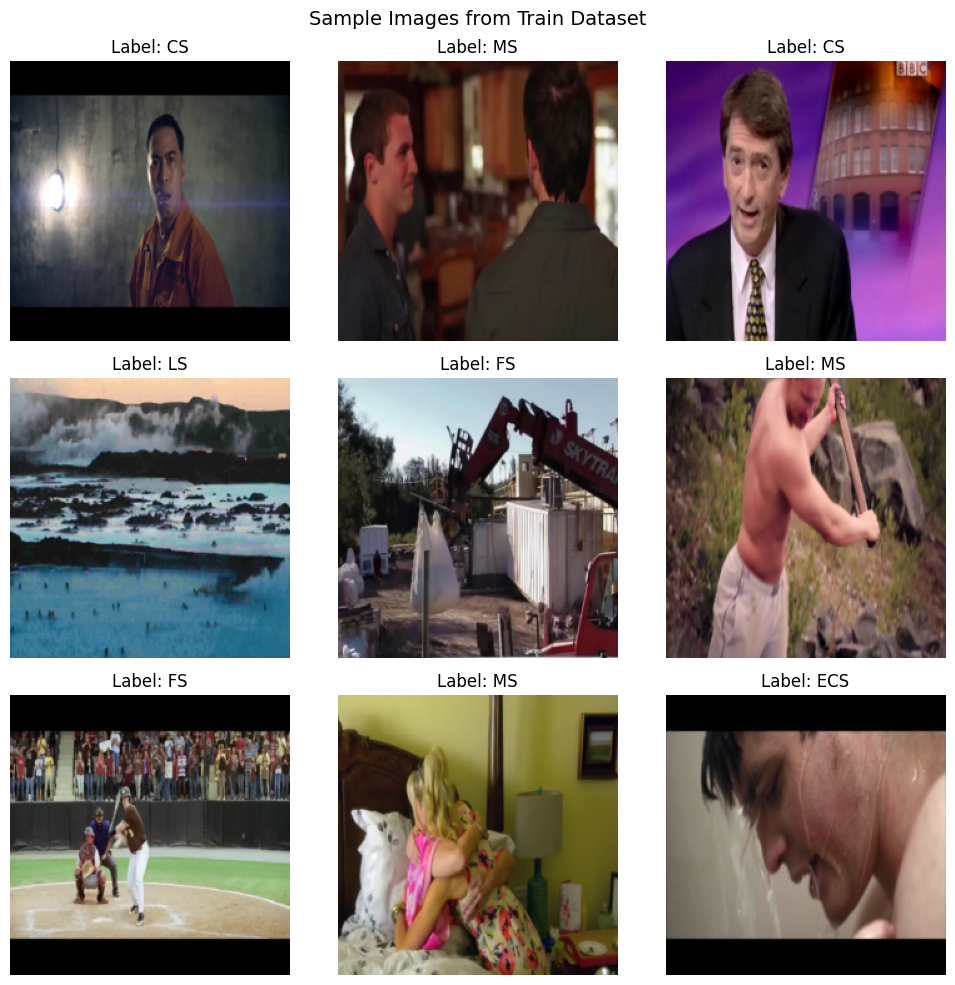

In [9]:
images, labels = next(iter(train_loader))
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle("Sample Images from Train Dataset", fontsize=14)

label_mapping = {0: "ECS", 1: "CS", 2: "MS", 3: "FS", 4: "LS"}

for i, ax in enumerate(axes.flat):
    img = images[i].permute(1, 2, 0).numpy()  # (C, H, W) to (H, W, C)
    img = (img - img.min()) / (img.max() - img.min())

    ax.imshow(img)
    ax.set_title(f"Label: {label_mapping[labels[i].item()]}")
    ax.axis("off")

plt.tight_layout()
plt.show()